In [62]:
%matplotlib notebook
from __future__ import print_function
from IPython.display import display

import numpy as np

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='ticks')
sns.set(style='whitegrid')

from sklearn.svm import SVC
import time

# from ipywidgets import interact, interactive, fixed, interact_manual
# import ipywidgets as widgets
# import pandas as pd


<IPython.core.display.Javascript object>


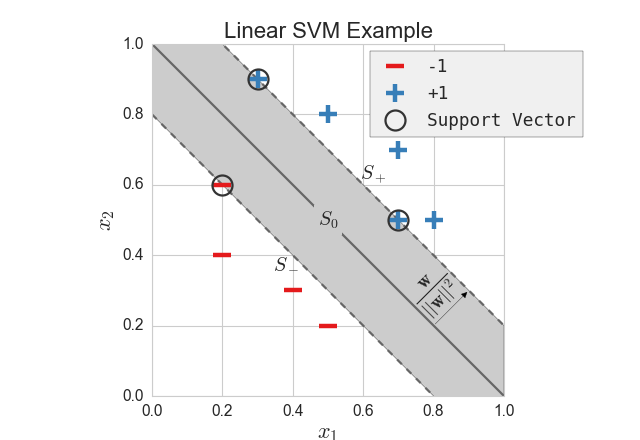

In [17]:
X = np.array([[0.2,0.4],
              [0.8,0.5],
              [0.4,0.3],
              [0.5,0.2],
              [0.2,0.6],
              [0.7,0.7],
              [0.3,0.9],
              [0.7,0.5],
              [0.5,0.8]])
Y = np.atleast_2d([1 if np.sum(xi) > 1 else -1 for xi in X]).T

svc = SVC(C=1000, kernel='linear', gamma='auto', shrinking=True, probability=False, tol=1e-12, cache_size=8000, max_iter=-1, decision_function_shape=None, random_state=None)
_ = svc.fit(X,Y.reshape(len(Y),))
w = svc.coef_.flatten()
b = svc.intercept_
sv = svc.support_vectors_
wnorm = np.linalg.norm(w)

fig,ax = plt.subplots(1)

x1 = np.linspace(0,1,2)
x2 = (-b - w[0]*x1)/w[1]
x2m = (-1-b - w[0]*x1)/w[1]
x2p = (1-b - w[0]*x1)/w[1]

x1mid = np.average(x1)
x2mid = np.average(x2m)

ax.fill_between(x1,x2m,x2p, facecolor='#CCCCCC')
ax.plot(x1, x2m, c='#666666', ls='dashed', lw=2)
ax.plot(x1, x2p, c='#666666', ls='dashed', lw=2)
ax.plot(x1, x2, c='#666666', lw=2)

posIdxs = np.where(Y > 0)[0]
negIdxs = np.where(Y < 0)[0]
ax.plot(X[negIdxs,0],X[negIdxs,1],c='#e41a1c',marker='_',ms=16,mew=4,lw=0,label='-1')
ax.plot(X[posIdxs,0],X[posIdxs,1],c='#377eb8',marker='+',ms=16,mew=4,lw=0,label='+1')
x = np.linspace(0,1,2)

ax.set_xlim(0,1)
ax.set_xlabel('$x_1$',fontsize=20)
ax.set_ylim(0,1)
ax.set_ylabel('$x_2$',fontsize=20)
ax.tick_params(axis='both', which='major', labelsize=14)
ax.set_title('Linear SVM Example',fontsize=20)
ax.plot(sv[:,0],sv[:,1],marker='o',ms=18,mew=2,lw=0,fillstyle='none',c='#333333',label='Support Vector')

legend = plt.legend(bbox_to_anchor=(0.62, 0.98), loc=2, borderaxespad=0., frameon=True, numpoints=1, fontsize=16)
plt.setp(legend.texts, family='monospace')
legend.get_frame().set_edgecolor('#000000')
legend.get_frame().set_facecolor('#F0F0F0')

bbox_props = dict(boxstyle="square,pad=0.2", fc="#CCCCCC", lw=0)
textS0Loc = (0.5,0.5)
textSmLoc = (0.38,0.38)
textSpLoc = (0.63,0.63)
arrowLoc = (0.8,0.2)

ax.text(textS0Loc[0],textS0Loc[1],r'$S_0$', ha='center', va='center', fontsize=18, rotation=0, bbox=bbox_props)
ax.text(textSmLoc[0],textSmLoc[1],r'$S_-$', ha='center', va='center', fontsize=18, rotation=0)
ax.text(textSpLoc[0],textSpLoc[1],r'$S_+$', ha='center', va='center', fontsize=18, rotation=0)

ax.annotate('', xy=arrowLoc, xytext=(arrowLoc[0]+w[0]/wnorm**2,arrowLoc[1]+w[1]/wnorm**2),arrowprops=dict(facecolor='black', arrowstyle='<|-'))
ax.text(arrowLoc[0]-0.08,arrowLoc[1]+.125,r'$\frac{\mathbf{w}}{||\mathbf{w}||^2}$', rotation=45, fontsize=24)

ax.set_aspect('equal')

<IPython.core.display.Javascript object>


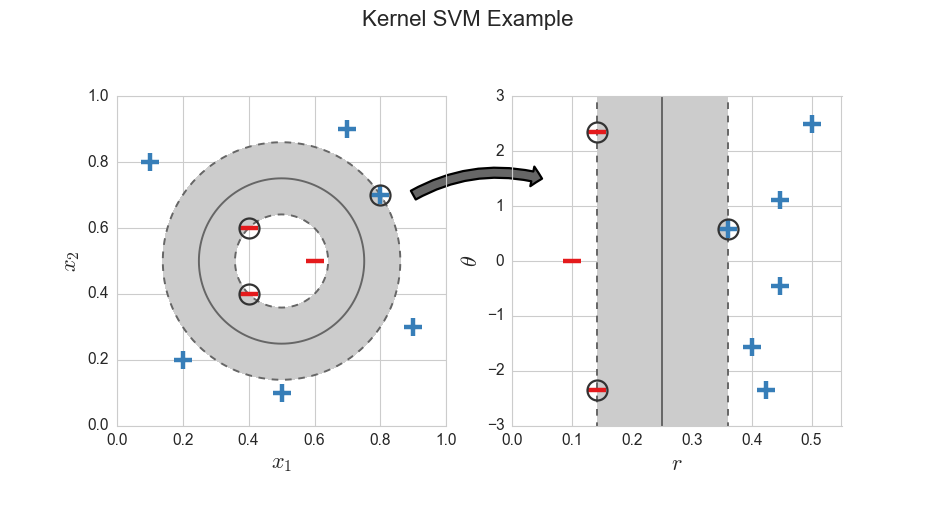

In [279]:
## Initialize our dataset
X = np.array([[0.6,0.5],
              [0.7,0.9],
              [0.8,0.7],
              [0.2,0.2],
              [0.1,0.8],
              [0.5,0.1],
              [0.9,0.3],
              [0.4,0.4],
              [0.4,0.6]])
Y = np.atleast_2d([1 if np.sum((xi-0.5)**2) > 0.3**2 else -1 for xi in X]).T

## Split the data to make plotting each set easier
posIdxs = np.where(Y > 0)[0]
negIdxs = np.where(Y < 0)[0]

## Define some convenience functions for converting between the two coordinate systems
def euclideanToPolar(x, y):
    r = np.sqrt((x)**2+(y)**2)
    theta = np.arctan2(y,x)
    return r,theta

def PolarToEuclidean(r, theta):
    x = r*np.cos(theta)
    y = r*np.sin(theta)
    return x,y

## Generate our transformed input space
xTransformed = np.zeros((len(X),2))
for i,xi in enumerate(X):
    xTransformed[i,:] = euclideanToPolar(*(xi-0.5))

## Fit the support vector on the transformed space
svc = SVC(C=1000, kernel='linear', gamma='auto', shrinking=False, tol=1e-12, cache_size=8000, max_iter=-1, random_state=None)
_ = svc.fit(xTransformed,Y.reshape(len(Y),))
svi = svc.support_

## Create a figure to plot side-by-side the original data space with support vector information
## and the transformed space with support vector information
fig = plt.figure()
ax = []
ax.append(fig.add_subplot(121, aspect='equal'))
ax.append(fig.add_subplot(122, aspect=0.55/6))

## Plot the labeled points in the original euclidean space
ax[0].plot(X[negIdxs,0],X[negIdxs,1],c='#e41a1c',marker='_',ms=16,mew=4,lw=0,label='-1')
ax[0].plot(X[posIdxs,0],X[posIdxs,1],c='#377eb8',marker='+',ms=16,mew=4,lw=0,label='+1')

## Circle the support vectors
ax[0].plot(X[svi,0],X[svi,1],marker='o',ms=18,mew=2,lw=0,fillstyle='none',c='#333333',label='Support Vector')

## Plot the margin and the limiting hyperplanes
y, x = np.meshgrid(np.arange(0.,1.,0.01),np.arange(0.,1.,0.01))
r,theta = euclideanToPolar(x-0.5,y-0.5)
z = svc.decision_function(zip(r.flatten(),theta.flatten()))
z = z.reshape(x.shape)
ax[0].contour(x, y, z, levels=[-1,0.0,1], colors='#666666', linestyles=['dashed','solid','dashed'])
ax[0].contourf(x, y, z, levels=[-1,1], colors='#CCCCCC')

## Plot the labeled points in the transformed polar space
ax[1].plot(xTransformed[negIdxs,0],xTransformed[negIdxs,1],c='#e41a1c',marker='_',ms=16,mew=4,lw=0,label='-1')
ax[1].plot(xTransformed[posIdxs,0],xTransformed[posIdxs,1],c='#377eb8',marker='+',ms=16,mew=4,lw=0,label='+1')

## Circle the support vectors
ax[1].plot(xTransformed[svi,0],xTransformed[svi,1],marker='o',ms=18,mew=2,lw=0,fillstyle='none',c='#333333',label='Support Vector')

## Plot the margin and the limiting hyperplanes
r,theta = np.meshgrid(np.arange(0.,1.,0.01),np.arange(-np.pi,np.pi,np.pi/200.))
z = svc.decision_function(zip(r.flatten(),theta.flatten()))
z = z.reshape(r.shape)
ax[1].contour(r, theta, z, levels=[-1,0.0,1], colors='#666666', linestyles=['dashed','solid','dashed'])
ax[1].contourf(r, theta, z, levels=[-1,1], colors='#CCCCCC')

## Ensure consistent look-and-feel of the plot
ax[0].set_xlim(0,1)
ax[0].set_xlabel('$x_1$',fontsize=20)
ax[0].set_ylim(0,1)
ax[0].set_ylabel('$x_2$',fontsize=20)
ax[0].tick_params(axis='both', which='major', labelsize=14)

ax[1].set_xlim(0,0.55)
ax[1].set_xlabel(r'$r$',fontsize=20)
ax[1].set_ylim(-3,3)
ax[1].set_ylabel(r'$\theta$',fontsize=20)
ax[1].tick_params(axis='both', which='major', labelsize=14)
fig.suptitle('Kernel SVM Example',fontsize=20)

## Draw an arrow to denote transformation
from matplotlib.patches import ConnectionPatch,ConnectionStyle,ArrowStyle
ax[0].patch.set_facecolor('None')
ax[1].patch.set_facecolor('None')
con = ConnectionPatch(xyA=(0.9,0.7), xyB=(0.05,1.5), coordsA="data", coordsB="data", axesA=ax[0], axesB=ax[1], connectionstyle=ConnectionStyle("Arc3", rad=-0.2), arrowstyle=ArrowStyle("Simple", head_length=1, head_width=2, tail_width=1), linewidth=2, facecolor='#666666')
ax[0].add_artist(con)